In [167]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin
from sklearn.grid_search import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

%matplotlib inline

## Join and Clean Data

In [168]:
test = pd.read_csv("../assets/test.csv")
train = pd.read_csv("../assets/train.csv")
spray = pd.read_csv("../assets/spray.csv")
weather = pd.read_csv("../assets/weather.csv")

In [169]:
#create spray column
train["spray"] = 0
spray["spray"] = 1

In [170]:
#join mosquito data with spray data
trainAndSpray = pd.DataFrame()
trainAndSpray = trainAndSpray.append(train)
trainAndSpray = trainAndSpray.append(spray)

In [171]:
# set Date as Index

trainAndSpray["Date"] = pd.to_datetime(trainAndSpray["Date"])
trainAndSpray = trainAndSpray.set_index('Date')
#trainAndSpray

,Address,AddressAccuracy,AddressNumberAndStreet,Block,Latitude,Longitude,NumMosquitos,Species,Street,Time,Trap,WnvPresent,spray
Date,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",9.0,"4100 N OAK PARK AVE, Chicago, IL",41.0,41.954690,-87.800991,1.0,CULEX PIPIENS/RESTUANS,N OAK PARK AVE,NaN,T002,0.0,0
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",9.0,"4100 N OAK PARK AVE, Chicago, IL",41.0,41.954690,-87.800991,1.0,CULEX RESTUANS,N OAK PARK AVE,NaN,T002,0.0,0
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",9.0,"6200 N MANDELL AVE, Chicago, IL",62.0,41.994991,-87.769279,1.0,CULEX RESTUANS,N MANDELL AVE,NaN,T007,0.0,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",8.0,"7900 W FOSTER AVE, Chicago, IL",79.0,41.974089,-87.824812,1.0,CULEX PIPIENS/RESTUANS,W FOSTER AVE,NaN,T015,0.0,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",8.0,"7900 W FOSTER AVE, Chicago, IL",79.0,41.974089,-87.824812,4.0,CULEX RESTUANS,W FOSTER AVE,NaN,T015,0.0,0
2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",8.0,"1500 W WEBSTER AVE, Chicago, IL",15.0,41.921600,-87.666455,2.0,CULEX RESTUANS,W WEBSTER AVE,NaN,T045,0.0,0
2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",8.0,"2500 W GRAND AVE, Chicago, IL",25.0,41.891118,-87.654491,1.0,CULEX RESTUANS,W GRAND AVE,NaN,T046,0.0,0
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",8.0,"1100 W ROOSEVELT, Chicago, IL",11.0,41.867108,-87.654224,1.0,CULEX PIPIENS/RESTUANS,W ROOSEVELT,NaN,T048,0.0,0
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",8.0,"1100 W ROOSEVELT, Chicago, IL",11.0,41.867108,-87.654224,2.0,CULEX RESTUANS,W ROOSEVELT,NaN,T048,0.0,0


In [172]:
# set Date as index for weather data

weather["Date"] = pd.to_datetime(weather["Date"])
weather = weather.set_index('Date')

In [173]:
# join trainSpray with Weather based on Date index

trainWeatherSpray = trainAndSpray.join(weather)

In [174]:
# write to csv

trainWeatherSpray.to_csv("../assets/trainWeatherSpray.csv")

In [175]:
# read from csv

data = pd.read_csv("../assets/trainWeatherSpray.csv")

In [176]:
# checking columns of our data

data.columns

Index([u'Date', u'Address', u'AddressAccuracy', u'AddressNumberAndStreet',
       u'Block', u'Latitude', u'Longitude', u'NumMosquitos', u'Species',
       u'Street', u'Time', u'Trap', u'WnvPresent', u'spray', u'Station',
       u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint', u'WetBulb', u'Heat',
       u'Cool', u'Sunrise', u'Sunset', u'CodeSum', u'Depth', u'Water1',
       u'SnowFall', u'PrecipTotal', u'StnPressure', u'SeaLevel',
       u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [177]:
#remove redundant location data, remove mosquito species for simplicity
# remove missing variables, and drop those rows

data = data[["Block","Latitude","Longitude","NumMosquitos","WnvPresent","spray","Tmax","Tmin","Tavg","DewPoint","Heat","Cool","PrecipTotal","StnPressure","SeaLevel","ResultSpeed","ResultDir","AvgSpeed"]]
data.replace('M', np.NaN, inplace=True)
data.replace('T', np.NaN, inplace=True)
data.replace('  T', np.NaN, inplace=True)
data.replace('nan', np.NaN, inplace=True)
data.dropna(inplace=True)
data.PrecipTotal.unique()

array(['0.00', '0.42', '0.27', '0.16', '1.55', '0.92', '0.01', '0.17',
       '0.04', '1.31', '0.06', '0.09', '0.05', '0.46', '0.23', '0.83',
       '0.37', '0.88', '0.24', '0.20', '0.18', '0.08', '0.12', '3.97',
       '0.87', '0.14', '0.19', '0.02', '0.03', '0.33', '0.95', '1.19',
       '0.89', '0.59', '0.52', '0.44', '0.39', '0.13', '0.70', '0.36',
       '0.79', '0.11', '0.50', '0.84', '0.58'], dtype=object)

In [178]:
# divide data into train and test for self validation of our model

X = data[["Block","Latitude","Longitude","NumMosquitos","spray","Tmax","Tmin","Tavg","DewPoint","Heat","Cool","PrecipTotal","StnPressure","SeaLevel","ResultSpeed","ResultDir","AvgSpeed"]]
y = data["WnvPresent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Prinicple Component Analysis

PCA allows us to reduce the amount of dimensions that we will use to predict if West Nile will be present.
We want to reduce dimensions that provide the same "data". We do not want duplicate data influencing our model.
This technique also helps reduce the complexity of our model, which reduces the run time of our code!

In [203]:
#Create a pipeline to scale and perform PCA

ss = StandardScaler()
pca = PCA()

pipe = Pipeline([('ss', ss),('pca', pca)])

columns = X_train.columns
tmp = np.array(X_train)
dataOriginal = pipe.fit_transform(tmp)
dataOriginal = pd.DataFrame(dataOriginal,columns=columns)
dataOriginal.head()

/Users/alexandertam/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexandertam/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Block,Latitude,Longitude,NumMosquitos,spray,Tmax,Tmin,Tavg,DewPoint,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,-0.457012,0.308741,2.458645,-1.682771,0.926754,-0.971408,0.886677,1.403605,0.361592,-0.038464,0.028490,-0.086465,-0.376392,0.210090,0.033747,-1.740355e-15,2.206375e-17
1,-0.445491,-1.445449,-0.707425,0.165447,-1.201001,-0.672116,0.116464,0.171221,-0.078254,0.896543,-0.431272,0.183918,0.035823,-0.169832,0.040180,-1.106366e-14,1.864957e-16
2,1.633875,3.187457,0.513231,-0.791300,-0.357721,-1.181256,-0.441105,-0.538863,0.858484,-0.981733,0.317139,-0.153686,0.224133,-0.220537,-0.038105,2.837509e-15,-7.396052e-17
3,-4.310614,2.826958,0.715851,-1.288881,0.226718,1.783329,2.491488,0.543589,-0.508293,0.524659,-0.842570,0.464734,-0.031594,-0.145662,-0.022960,-1.955112e-14,4.029497e-16
4,0.488232,-1.466033,1.248459,0.702633,-1.199382,-1.878947,-0.405369,0.315748,0.572056,-0.013855,-0.234557,0.239809,0.181700,-0.116208,0.034281,8.688522e-15,2.672078e-15


In [180]:
sumExplainedVariance = sum(pca.explained_variance_)
varianceExplained = [(i / sumExplainedVariance)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cumulativeVarianceexplained = np.cumsum(varianceExplained)

In [181]:
varianceExplained

[35.396455045965567,
 16.431405500997254,
 10.860005615874776,
 7.2064317204384842,
 6.9989015246677697,
 5.9919068105670164,
 5.0974789115012236,
 4.0935689443274148,
 3.0939380041004587,
 1.7450289107306778,
 1.6371704912178739,
 0.67651375056352803,
 0.52044456932949557,
 0.24403728897095653,
 0.0067129107475134868,
 5.9552232503868686e-31,
 3.5946516712728118e-33]

In [182]:
cumulativeVarianceexplained

array([  35.39645505,   51.82786055,   62.68786616,   69.89429788,
         76.89319941,   82.88510622,   87.98258513,   92.07615407,
         95.17009208,   96.91512099,   98.55229148,   99.22880523,
         99.7492498 ,   99.99328709,  100.        ,  100.        ,  100.        ])

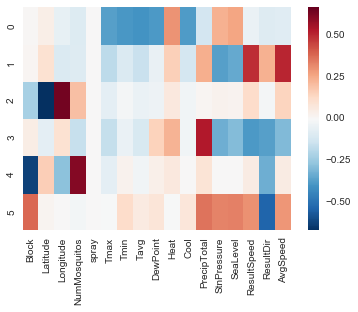

In [183]:
pcaData = pd.DataFrame(pca.components_,columns=columns)
plt.figure(figsize=(16, 10))
sns.heatmap(pcaData.iloc[0:6,:])

In [184]:
#remove Latitude and Longitude because their is little variance in them bc most of the sites are in Chicago
#remove spray because it doesn't contribute to the heatmap in any of the PCAs

del data["Latitude"]
del data["Longitude"]
del data["spray"]

In [185]:
#redo our PCA 

ss = StandardScaler()
pca = PCA()

pipe = Pipeline([('ss', ss),('pca', pca)])

columns = data.columns
tmp = np.array(data)
dataOriginal = pipe.fit_transform(tmp)
dataOriginal = pd.DataFrame(dataOriginal,columns=columns)
dataOriginal.head()

/Users/alexandertam/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexandertam/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Block,NumMosquitos,WnvPresent,Tmax,Tmin,Tavg,DewPoint,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,-0.470598,1.089685,0.432526,1.171342,0.007870,-0.512575,0.529424,-0.035967,0.097721,0.617642,-0.424123,-0.014013,-0.084749,0.036971,3.752689e-15
1,0.153091,1.245658,0.276561,1.317341,-0.040085,-0.995329,0.566949,0.027618,-0.338709,0.308369,0.030660,0.171721,0.121045,-0.030286,3.450422e-15
2,-0.470598,1.089685,0.432526,1.171342,0.007870,-0.512575,0.529424,-0.035967,0.097721,0.617642,-0.424123,-0.014013,-0.084749,0.036971,2.352282e-16
3,0.153091,1.245658,0.276561,1.317341,-0.040085,-0.995329,0.566949,0.027618,-0.338709,0.308369,0.030660,0.171721,0.121045,-0.030286,6.200265e-15
4,-0.474351,1.083161,0.836675,1.262937,0.610637,-0.732716,0.138770,-0.137603,0.106373,0.613958,-0.428046,-0.009198,-0.083059,0.037701,-1.330604e-14


In [186]:
sumExplainedVariance = sum(pca.explained_variance_)
varianceExplained = [(i / sumExplainedVariance)*100 for i in sorted(pca.explained_variance_, reverse=True)]
cumulativeVarianceexplained = np.cumsum(varianceExplained)

In [187]:
varianceExplained

[37.542755429842309,
 17.370783266041929,
 8.3878530417200121,
 7.7042289498697984,
 6.7161396108333671,
 6.415489744716778,
 4.8882089430551279,
 4.2902319082301359,
 3.3509207878734681,
 1.7700589858008511,
 0.7312641071005076,
 0.5630334595140315,
 0.26177919145978018,
 0.007252573941910292,
 3.2123140635935358e-31]

In [188]:
cumulativeVarianceexplained

array([  37.54275543,   54.9135387 ,   63.30139174,   71.00562069,
         77.7217603 ,   84.13725004,   89.02545899,   93.31569089,
         96.66661168,   98.43667067,   99.16793478,   99.73096823,
         99.99274743,  100.        ,  100.        ])

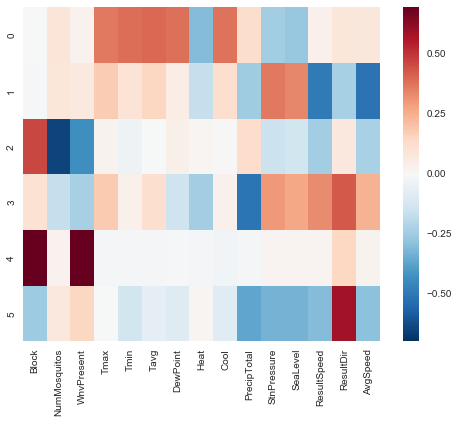

In [189]:
pcaData = pd.DataFrame(pca.components_,columns=columns)
plt.figure(figsize=(16, 10))
sns.heatmap(pcaData.iloc[0:6,:])

## Confirm that our PCA reduces dimensionality

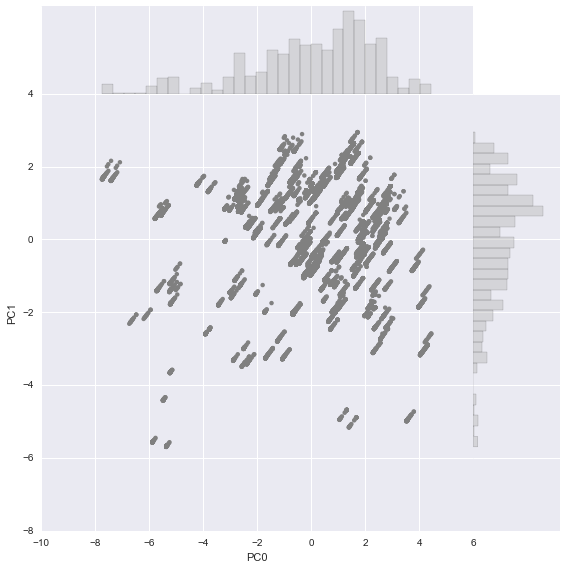

In [190]:
g = sns.JointGrid(dataOriginal.iloc[:,0], dataOriginal.iloc[:,1], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC0', ylabel='PC1')

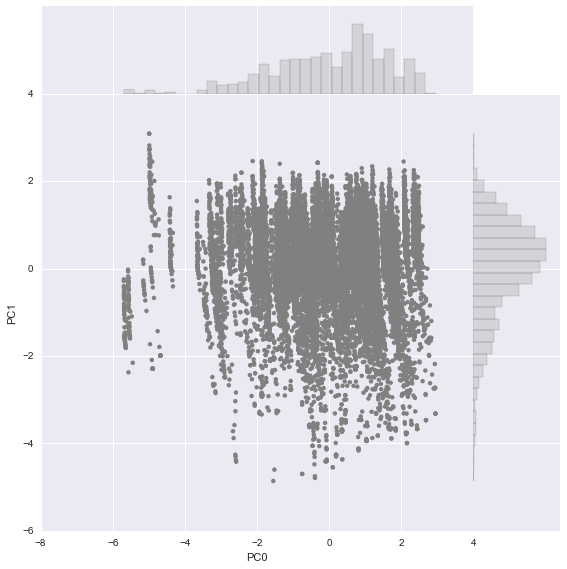

In [191]:
g = sns.JointGrid(dataOriginal.iloc[:,1], dataOriginal.iloc[:,2], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC0', ylabel='PC1')

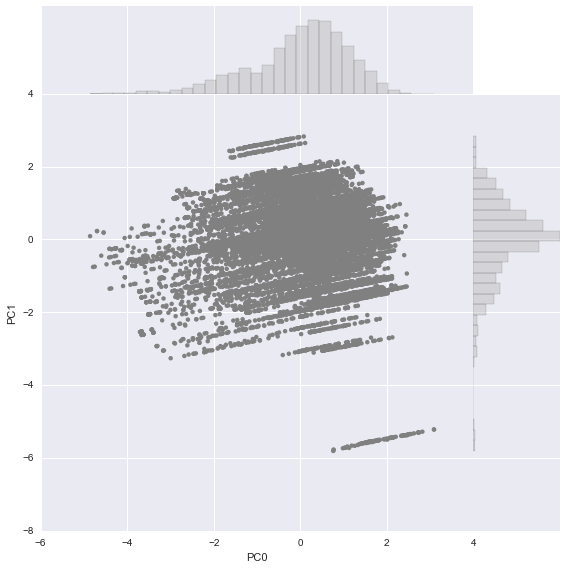

In [192]:
g = sns.JointGrid(dataOriginal.iloc[:,2], dataOriginal.iloc[:,3], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC0', ylabel='PC1')

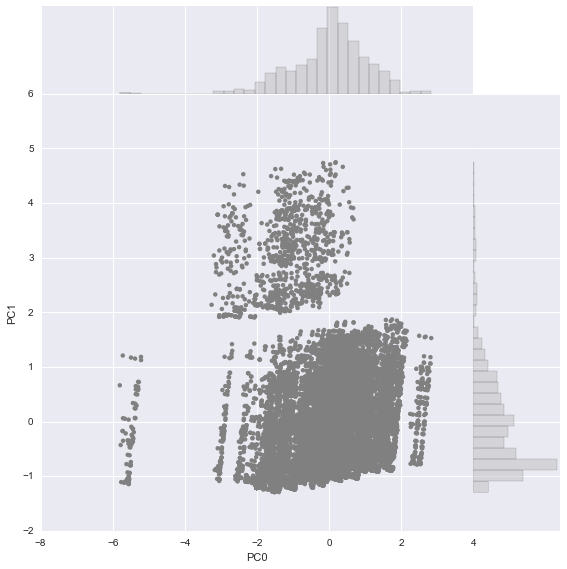

In [193]:
g = sns.JointGrid(dataOriginal.iloc[:,3], dataOriginal.iloc[:,4], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC0', ylabel='PC1')

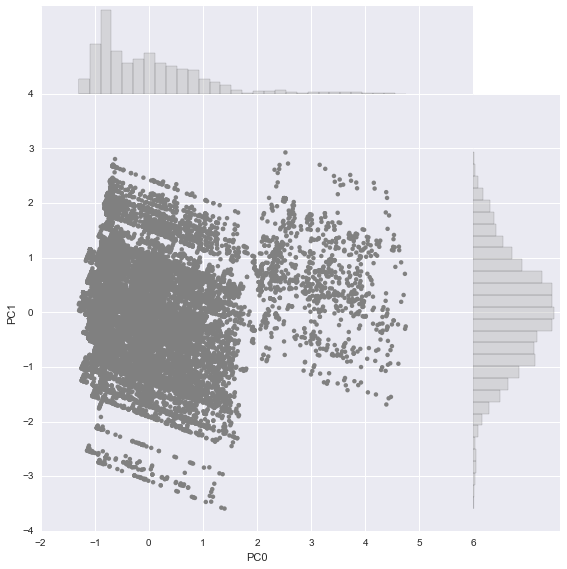

In [194]:
g = sns.JointGrid(dataOriginal.iloc[:,4], dataOriginal.iloc[:,5], space=0, size=8)
g.plot_marginals(sns.distplot, kde=False, color=".7", bins=30)
g.plot_joint(plt.scatter, color=".5", edgecolor="none", alpha=1)
g.set_axis_labels(xlabel='PC0', ylabel='PC1')

## RandomForestClassifier

In [195]:
ss = StandardScaler()
pca = PCA()
rfc = RandomForestClassifier() 

pipe = Pipeline([('ss', ss),('pca', pca),('rfc',rfc)])

In [202]:
param_grid = {"pca__n_components":[1,2,3,5,6,7,8,9]}
param_grid = {"pca__n_components":[1,2,3,5,6,7,8,9],'rfc__max_depth':[1,2,3,4,5,6],'rfc__max_leaf_nodes':[5,6,7,8,9], 'rfc__min_samples_leaf':[1,2,3,4],'rfc__min_samples_split':[1,2,3,4]}
grid_search = GridSearchCV(pipe, param_grid=param_grid, verbose=10,n_jobs=1)
print grid_search.get_params().keys()
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

['estimator__rfc__n_estimators', 'n_jobs', 'estimator__rfc__bootstrap', 'verbose', 'estimator__rfc', 'estimator__rfc__max_depth', 'estimator__rfc__min_weight_fraction_leaf', 'estimator__steps', 'estimator__pca__copy', 'param_grid', 'cv', 'estimator__rfc__min_samples_leaf', 'scoring', 'estimator__rfc__min_samples_split', 'estimator__ss__copy', 'estimator__rfc__verbose', 'pre_dispatch', 'estimator__rfc__oob_score', 'estimator__ss', 'estimator__rfc__max_features', 'estimator__pca__whiten', 'estimator__rfc__warm_start', 'estimator__rfc__random_state', 'estimator__rfc__class_weight', 'fit_params', 'estimator__ss__with_std', 'estimator__rfc__criterion', 'estimator__ss__with_mean', 'refit', 'iid', 'estimator__rfc__n_jobs', 'estimator__pca__n_components', 'estimator__pca', 'estimator', 'error_score', 'estimator__rfc__max_leaf_nodes']
Fitting 3 folds for each of 3840 candidates, totalling 11520 fits
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.9s


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    2.9s


[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    5.1s


[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    8.8s


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   12.3s


[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:   16.9s


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:   21.4s


[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:   26.7s


[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   31.9s


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done  60 tasks       | elapsed:   38.2s


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:   44.5s


[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done  84 tasks       | elapsed:   52.4s


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945983 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done  97 tasks       | elapsed:  1.0min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 112 tasks       | elapsed:  1.1min


[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=2, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=2, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 127 tasks       | elapsed:  1.3min


[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 144 tasks       | elapsed:  1.5min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  1.6min


[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 180 tasks       | elapsed:  1.8min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  2.0min


[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 220 tasks       | elapsed:  2.3min


[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 241 tasks       | elapsed:  2.5min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 264 tasks       | elapsed:  2.8min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 287 tasks       | elapsed:  3.1min


[CV]  rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 312 tasks       | elapsed:  3.4min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 337 tasks       | elapsed:  3.7min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.9s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 364 tasks       | elapsed:  4.0min


[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 391 tasks       | elapsed:  4.3min


[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 420 tasks       | elapsed:  4.6min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  5.0min


[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 480 tasks       | elapsed:  5.4min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 511 tasks       | elapsed:  5.8min


[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 544 tasks       | elapsed:  6.1min


[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 577 tasks       | elapsed:  6.5min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 612 tasks       | elapsed:  6.9min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 647 tasks       | elapsed:  7.3min


[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 684 tasks       | elapsed:  7.7min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 721 tasks       | elapsed:  8.1min


[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 760 tasks       | elapsed:  8.5min


[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:  9.0min


[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 840 tasks       | elapsed:  9.4min


[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 881 tasks       | elapsed:  9.9min


[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 924 tasks       | elapsed: 10.3min


[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 967 tasks       | elapsed: 10.8min


[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 1012 tasks       | elapsed: 11.3min


[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 1057 tasks       | elapsed: 11.8min


[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 1104 tasks       | elapsed: 12.3min


[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 1151 tasks       | elapsed: 12.8min


[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 1200 tasks       | elapsed: 13.3min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed: 13.9min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 1300 tasks       | elapsed: 14.4min


[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 1351 tasks       | elapsed: 15.0min


[CV]  rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 1404 tasks       | elapsed: 15.6min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=1, rfc_

[Parallel(n_jobs=1)]: Done 1457 tasks       | elapsed: 16.2min


[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.5s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 1512 tasks       | elapsed: 16.8min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945983 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 1567 tasks       | elapsed: 17.3min


[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 1624 tasks       | elapsed: 17.9min


[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945983 -   0.9s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 1681 tasks       | elapsed: 18.6min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.9s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 1740 tasks       | elapsed: 19.3min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed: 20.0min


[CV]  rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 1860 tasks       | elapsed: 20.7min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 1921 tasks       | elapsed: 21.4min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 1984 tasks       | elapsed: 22.1min


[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2047 tasks       | elapsed: 22.8min


[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2112 tasks       | elapsed: 23.5min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2177 tasks       | elapsed: 24.2min


[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2244 tasks       | elapsed: 25.0min


[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2311 tasks       | elapsed: 25.8min


[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2380 tasks       | elapsed: 26.5min


[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3, score=0.945768 -   1.0s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed: 27.4min


[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2520 tasks       | elapsed: 28.2min


[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2591 tasks       | elapsed: 29.0min


[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=2, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2664 tasks       | elapsed: 29.7min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2737 tasks       | elapsed: 30.5min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945756 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   1.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2812 tasks       | elapsed: 31.3min


[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=2, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=2, rfc_

[Parallel(n_jobs=1)]: Done 2887 tasks       | elapsed: 32.1min


[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.5s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 2964 tasks       | elapsed: 32.9min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945983 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3041 tasks       | elapsed: 33.6min


[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.5s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.5s
[CV] rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3120 tasks       | elapsed: 34.5min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.9s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed: 35.5min


[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3280 tasks       | elapsed: 36.4min


[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3361 tasks       | elapsed: 37.3min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3444 tasks       | elapsed: 38.2min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3527 tasks       | elapsed: 39.1min


[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3612 tasks       | elapsed: 40.0min


[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.9s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3697 tasks       | elapsed: 41.0min


[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3784 tasks       | elapsed: 41.9min


[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3871 tasks       | elapsed: 42.9min


[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 3960 tasks       | elapsed: 43.9min


[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed: 44.9min


[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=3, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 4140 tasks       | elapsed: 46.0min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 4231 tasks       | elapsed: 47.0min


[CV]  rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=3, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=3, rfc_

[Parallel(n_jobs=1)]: Done 4324 tasks       | elapsed: 48.0min


[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=1, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 4417 tasks       | elapsed: 50.1min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 4512 tasks       | elapsed: 51.2min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 4607 tasks       | elapsed: 52.3min


[CV]  rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 4704 tasks       | elapsed: 53.3min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 4801 tasks       | elapsed: 54.4min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 4900 tasks       | elapsed: 55.5min


[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed: 56.7min


[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 5100 tasks       | elapsed: 57.8min


[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 5201 tasks       | elapsed: 59.0min


[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=5, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 5304 tasks       | elapsed: 60.2min


[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 5407 tasks       | elapsed: 61.4min


[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 5512 tasks       | elapsed: 62.6min


[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 5617 tasks       | elapsed: 63.8min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 5724 tasks       | elapsed: 65.0min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=5, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=5, rfc_

[Parallel(n_jobs=1)]: Done 5831 tasks       | elapsed: 66.2min


[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 5940 tasks       | elapsed: 67.4min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed: 68.6min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 6160 tasks       | elapsed: 69.9min


[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 6271 tasks       | elapsed: 71.1min


[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 6384 tasks       | elapsed: 72.3min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=6, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 6497 tasks       | elapsed: 74.3min


[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 6612 tasks       | elapsed: 75.6min


[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 6727 tasks       | elapsed: 76.8min


[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 6844 tasks       | elapsed: 78.1min


[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 6961 tasks       | elapsed: 79.4min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 7080 tasks       | elapsed: 80.7min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=6, rfc_

[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed: 82.0min


[CV]  rfc__min_samples_split=4, rfc__max_depth=6, pca__n_components=6, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 7320 tasks       | elapsed: 83.4min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 7441 tasks       | elapsed: 84.8min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 7564 tasks       | elapsed: 86.3min


[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 7687 tasks       | elapsed: 87.7min


[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 7812 tasks       | elapsed: 89.0min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=7, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 7937 tasks       | elapsed: 90.5min


[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=2, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 8064 tasks       | elapsed: 91.9min


[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 8191 tasks       | elapsed: 93.3min


[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 8320 tasks       | elapsed: 94.8min


[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.9s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.9s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed: 96.3min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 8580 tasks       | elapsed: 97.7min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=7, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=7, rfc_

[Parallel(n_jobs=1)]: Done 8711 tasks       | elapsed: 99.1min


[CV]  rfc__min_samples_split=4, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=3, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=8, rfc_

[Parallel(n_jobs=1)]: Done 8844 tasks       | elapsed: 100.7min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=8, rfc_

[Parallel(n_jobs=1)]: Done 8977 tasks       | elapsed: 102.1min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=8, rfc_

[Parallel(n_jobs=1)]: Done 9112 tasks       | elapsed: 103.6min


[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4 
[CV]  rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=4, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=2, pca__n_components=8, rfc_

[Parallel(n_jobs=1)]: Done 9247 tasks       | elapsed: 105.0min


[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=3, rfc__max_depth=3, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=3, pca__n_components=8, rfc_

[Parallel(n_jobs=1)]: Done 9384 tasks       | elapsed: 106.5min


[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=3, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=8, rfc_

[Parallel(n_jobs=1)]: Done 9521 tasks       | elapsed: 108.0min


[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=8, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=8, rfc_

[Parallel(n_jobs=1)]: Done 9660 tasks       | elapsed: 109.5min


[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=8, rfc_

[Parallel(n_jobs=1)]: Done 9799 tasks       | elapsed: 110.9min


[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=8, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=8, rfc_

[Parallel(n_jobs=1)]: Done 9940 tasks       | elapsed: 112.5min


[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=8, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=6, pca__n_components=8, rfc_

[Parallel(n_jobs=1)]: Done 10081 tasks       | elapsed: 114.1min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=9, rfc_

[Parallel(n_jobs=1)]: Done 10224 tasks       | elapsed: 115.8min


[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.6s
[CV] rfc__min_samples_split=2, rfc__max_depth=1, pca__n_components=9, rfc_

[Parallel(n_jobs=1)]: Done 10367 tasks       | elapsed: 117.5min


[CV]  rfc__min_samples_split=4, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=4, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=1, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=9, rfc_

[Parallel(n_jobs=1)]: Done 10512 tasks       | elapsed: 119.3min


[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=2, pca__n_components=9, rfc_

[Parallel(n_jobs=1)]: Done 10657 tasks       | elapsed: 121.2min


[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   1.9s
[CV] rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=1, rfc__max_depth=3, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=3, pca__n_components=9, rfc_

[Parallel(n_jobs=1)]: Done 10804 tasks       | elapsed: 123.2min


[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=2, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=5, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=9, rfc_

[Parallel(n_jobs=1)]: Done 10951 tasks       | elapsed: 125.0min


[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=3, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1 
[CV]  rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=9, rfc__max_leaf_nodes=8, rfc__min_samples_leaf=1, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=4, rfc__max_depth=4, pca__n_components=9, rfc_

[Parallel(n_jobs=1)]: Done 11100 tasks       | elapsed: 126.9min


[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=1, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=6, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=9, rfc_

[Parallel(n_jobs=1)]: Done 11249 tasks       | elapsed: 128.8min


[CV]  rfc__min_samples_split=2, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.7s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2 
[CV]  rfc__min_samples_split=3, rfc__max_depth=5, pca__n_components=9, rfc__max_leaf_nodes=9, rfc__min_samples_leaf=2, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=4, rfc__max_depth=5, pca__n_components=9, rfc_

[Parallel(n_jobs=1)]: Done 11400 tasks       | elapsed: 130.8min


[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.8s
[CV] rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=1, rfc__max_depth=6, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945983 -   0.8s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3 
[CV]  rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=9, rfc__max_leaf_nodes=7, rfc__min_samples_leaf=3, score=0.945768 -   0.7s
[CV] rfc__min_samples_split=2, rfc__max_depth=6, pca__n_components=9, rfc_

[Parallel(n_jobs=1)]: Done 11520 out of 11520 | elapsed: 132.4min finished


Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=1, whiten=False)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=5,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False))])


In [ ]:
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

In [197]:
# optimized = Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=7, whiten=False)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='sqrt', max_leaf_nodes=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
#             oob_score=True, random_state=None, verbose=0, warm_start=False))])

In [204]:
Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=1, whiten=False)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=5,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False))])

Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=1, whiten=False)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='sqrt', max_leaf_nodes=5,
            min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False))])

In [205]:
optimized.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=7, whiten=False)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False))])

In [206]:
predictedRf = optimized.predict(X_test)
probsRf = optimized.predict_proba(X_test)

In [207]:
print "The Random Forest Classifier's accuracy score is", metrics.accuracy_score(y_test, predictedRf)
print "The Random Forest Classifier's area under the curve is", metrics.roc_auc_score(y_test, probsRf[:, 1])

The Random Forest Classifier's accuracy score is 0.950229438758
The Random Forest Classifier's area under the curve is 0.849651461375


## ADA BOOST

In [209]:
ss = StandardScaler()
pca = PCA()
ada = AdaBoostClassifier()

pipe = Pipeline([('ss', ss),('pca', pca),('rfc',rfc)])

In [210]:
param_grid = {"pca__n_components":[1,2,3,5,6,7,8,9]}
grid_search = GridSearchCV(pipe, param_grid=param_grid, verbose=10,n_jobs=1)
print grid_search.get_params().keys()

['estimator__rfc__n_estimators', 'n_jobs', 'verbose', 'estimator__rfc__algorithm', 'estimator__steps', 'estimator__pca__copy', 'param_grid', 'cv', 'scoring', 'estimator__ss__copy', 'pre_dispatch', 'estimator__pca__n_components', 'estimator__pca__whiten', 'estimator__rfc', 'estimator__rfc__random_state', 'fit_params', 'estimator__ss__with_std', 'estimator__ss__with_mean', 'refit', 'iid', 'estimator__rfc__base_estimator', 'estimator__ss', 'estimator__pca', 'estimator', 'error_score', 'estimator__rfc__learning_rate']


In [211]:
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] pca__n_components=1 .............................................
[CV] .................... pca__n_components=1, score=0.945541 -   0.5s
[CV] pca__n_components=1 .............................................


[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.6s


[CV] .................... pca__n_components=1, score=0.945768 -   0.5s
[CV] pca__n_components=1 .............................................
[CV] .................... pca__n_components=1, score=0.945983 -   0.5s
[CV] pca__n_components=2 .............................................
[CV] .................... pca__n_components=2, score=0.945768 -   0.5s
[CV] pca__n_components=2 .............................................


[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    2.1s


[CV] .................... pca__n_components=2, score=0.945768 -   0.6s
[CV] pca__n_components=2 .............................................
[CV] .................... pca__n_components=2, score=0.945983 -   0.5s
[CV] pca__n_components=3 .............................................
[CV] .................... pca__n_components=3, score=0.945314 -   0.6s
[CV] pca__n_components=3 .............................................


[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    3.8s


[CV] .................... pca__n_components=3, score=0.945768 -   0.6s
[CV] pca__n_components=3 .............................................
[CV] .................... pca__n_components=3, score=0.945983 -   0.6s
[CV] pca__n_components=5 .............................................
[CV] .................... pca__n_components=5, score=0.945768 -   0.9s
[CV] pca__n_components=5 .............................................
[CV] .................... pca__n_components=5, score=0.945541 -   0.8s
[CV] pca__n_components=5 .............................................
[CV] .................... pca__n_components=5, score=0.945983 -   0.8s
[CV] pca__n_components=6 .............................................


[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    7.6s


[CV] .................... pca__n_components=6, score=0.944860 -   0.9s
[CV] pca__n_components=6 .............................................
[CV] .................... pca__n_components=6, score=0.945314 -   0.9s
[CV] pca__n_components=6 .............................................
[CV] .................... pca__n_components=6, score=0.945983 -   0.8s
[CV] pca__n_components=7 .............................................
[CV] .................... pca__n_components=7, score=0.944407 -   1.1s
[CV] pca__n_components=7 .............................................
[CV] .................... pca__n_components=7, score=0.945541 -   1.2s
[CV] pca__n_components=7 .............................................


[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:   12.5s


[CV] .................... pca__n_components=7, score=0.944167 -   1.3s
[CV] pca__n_components=8 .............................................
[CV] .................... pca__n_components=8, score=0.943953 -   1.3s
[CV] pca__n_components=8 .............................................
[CV] .................... pca__n_components=8, score=0.943045 -   1.3s
[CV] pca__n_components=8 .............................................
[CV] .................... pca__n_components=8, score=0.944621 -   1.0s
[CV] pca__n_components=9 .............................................
[CV] .................... pca__n_components=9, score=0.943953 -   1.7s
[CV] pca__n_components=9 .............................................
[CV] .................... pca__n_components=9, score=0.943726 -   1.1s
[CV] pca__n_components=9 .............................................
[CV] .................... pca__n_components=9, score=0.943713 -   1.1s


[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:   21.3s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   21.3s finished


Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=2, whiten=False)), ('rfc', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])


In [212]:
optimized = Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=2, whiten=False)), ('rfc', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [213]:
optimized.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=2, whiten=False)), ('rfc', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [214]:
predictedAda = optimized.predict(X_test)
probsAda = optimized.predict_proba(X_test)

In [215]:
print "The AdaBoost Classifier's accuracy score is", metrics.accuracy_score(y_test, predictedAda)
print "The AdaBoost Forest Classifier's area under the curve is", metrics.roc_auc_score(y_test, probsAda[:, 1])

The AdaBoost Classifier's accuracy score is 0.951288386869
The AdaBoost Forest Classifier's area under the curve is 0.722119262725


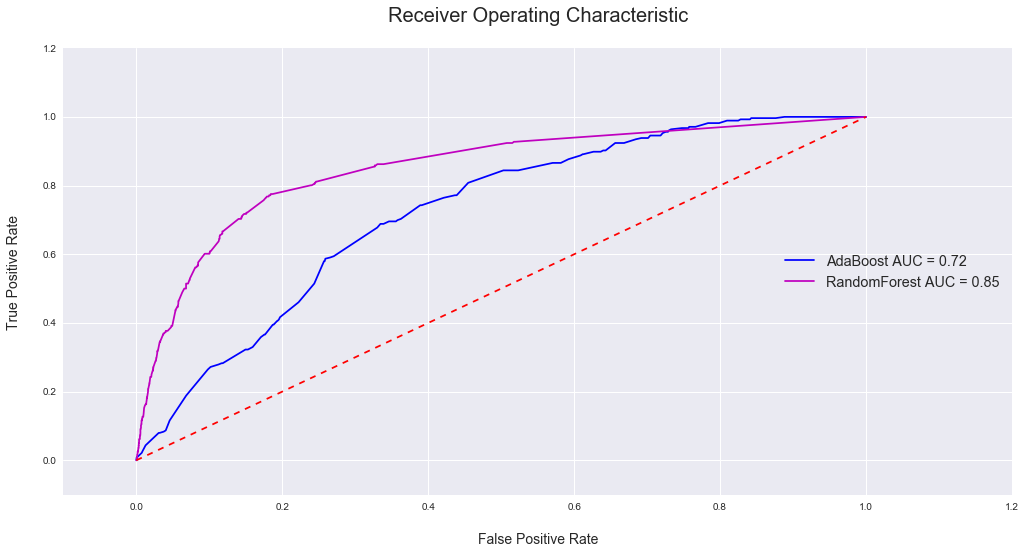

In [216]:
adaFalse_positive_rate, adaTrue_positive_rate, adaThresholds = metrics.roc_curve(y_test, probsAda[:, 1])
adaRoc_auc = metrics.auc(adaFalse_positive_rate, adaTrue_positive_rate)

rfFalse_positive_rate, rfTrue_positive_rate, rfThresholds = metrics.roc_curve(y_test, probsRf[:, 1])
rfRoc_auc = metrics.auc(rfFalse_positive_rate, rfTrue_positive_rate)

plt.rcParams['figure.figsize']=17,8
plt.title('Receiver Operating Characteristic\n', fontsize=20)

plt.plot(adaFalse_positive_rate, adaTrue_positive_rate, 'b',
label='AdaBoost AUC = %0.2f'% adaRoc_auc)

plt.plot(rfFalse_positive_rate, rfTrue_positive_rate, 'm',
label='RandomForest AUC = %0.2f'% rfRoc_auc)

plt.legend(loc=7, fontsize='x-large', )
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate\n', fontsize=14)
plt.xlabel('\nFalse Positive Rate', fontsize=14)
plt.show()